# Exploring the Datasets

In this notebook, we're going to have a look at the data and see what insights we can obtain.

In [1]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Global variables
DATASETS_PATH = '../datasets'

## 1. Population

The first dataset is a list of people and its characteristics.

In [3]:
# Load the dataset
population = pd.read_excel(f'{DATASETS_PATH}/original/individuos_espec.xlsx')

# Translate columns to english
population = population.rename(columns={
    'name': 'name',
    'idade': 'age',
    'estado_civil': 'marital_status',
    'qt_filhos': 'n_children',
    'estuda': 'study',
    'trabalha': 'work',
    'pratica_esportes': 'play_sports',
    'transporte_mais_utilizado': 'transportation',
    'IMC': 'body_mass_index'
})

# Translate values to english
population = population.replace({
    'divorciado': 'divorced',
    'casado': 'married',
    'solteiro': 'single',
    'viuvo': 'widow',
    'publico': 'public',
    'particular': 'private',
    'taxi': 'taxi',
})

population.head()

,name,age,marital_status,n_children,study,work,play_sports,transportation,body_mass_index
0,1,44.0,divorced,1.0,1.0,0.0,1.0,public,2.220096e+14
1,2,24.0,married,0.0,0.0,0.0,1.0,public,2.537872e+14
2,3,35.0,single,1.0,0.0,0.0,1.0,private,1.995239e+14
3,4,50.0,married,1.0,1.0,1.0,0.0,public,2.673205e+14
4,5,30.0,single,2.0,1.0,0.0,1.0,public,1.529567e+14


In [4]:
# Save new dataset
population.to_csv(f'{DATASETS_PATH}/processed/individuos_espec_eda.csv', index=False)

In [5]:
# Dataset shape
print(f'dataset shape: {population.shape}')

dataset shape: (1000000, 9)


In [6]:
# Features and types
population.dtypes

name                 int64
age                float64
marital_status      object
n_children         float64
study              float64
work               float64
play_sports        float64
transportation      object
body_mass_index    float64
dtype: object

In [7]:
# Check for missing or null values in order_products
print(f'number of missing values: {population.isna().sum().sum()}')

number of missing values: 527387


In [8]:
# Locating the missing values
population.isna().sum()

name                    0
age                 95937
marital_status      50073
n_children          28867
study               40130
work                 6353
play_sports        149124
transportation      43033
body_mass_index    113870
dtype: int64

In [9]:
# Dataset statistics
population.describe()

,name,age,n_children,study,work,play_sports,body_mass_index
count,1000000.000000,904063.000000,971133.000000,959870.000000,993647.000000,850876.000000,8.861300e+05
mean,500000.500000,30.008431,0.928406,0.442588,0.556739,0.599823,2.089921e+14
std,288675.278932,10.951566,0.997289,0.496693,0.496771,0.489934,1.051577e+14
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.371942e+09
25%,250000.750000,22.000000,0.000000,0.000000,0.000000,0.000000,1.604842e+14
50%,500000.500000,29.000000,1.000000,0.000000,1.000000,1.000000,2.063203e+14
75%,750000.250000,37.000000,1.000000,1.000000,1.000000,1.000000,2.584227e+14
max,1000000.000000,124.000000,9.000000,1.000000,1.000000,1.000000,9.999966e+14


In [10]:
# Number of unique values
population.nunique()

name               1000000
age                    105
marital_status           4
n_children              10
study                    2
work                     2
play_sports              2
transportation           3
body_mass_index     886130
dtype: int64

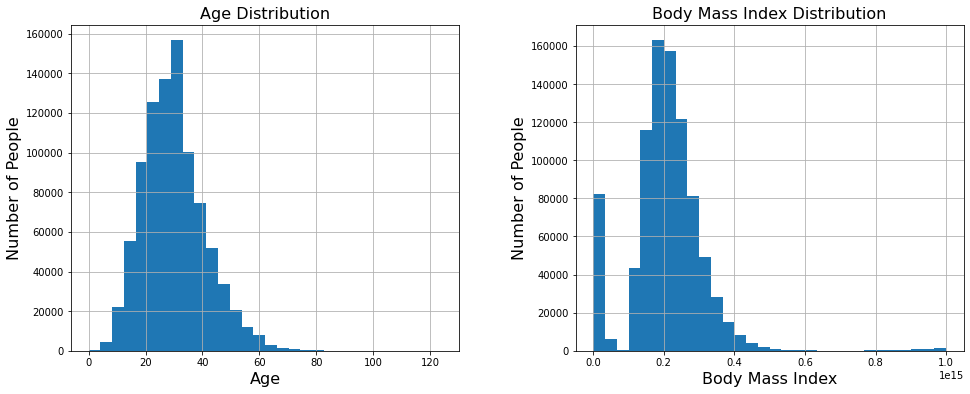

In [11]:
# Numerical distributions
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

population.hist('age', bins=30, ax=ax[0])
ax[0].set_xlabel('Age', size=16)
ax[0].set_ylabel('Number of People', size=16)
ax[0].set_title('Age Distribution', size=16)

population.hist('body_mass_index', bins=30, ax=ax[1])
ax[1].set_xlabel('Body Mass Index', size=16)
ax[1].set_ylabel('Number of People', size=16)
ax[1].set_title('Body Mass Index Distribution', size=16)

plt.show()

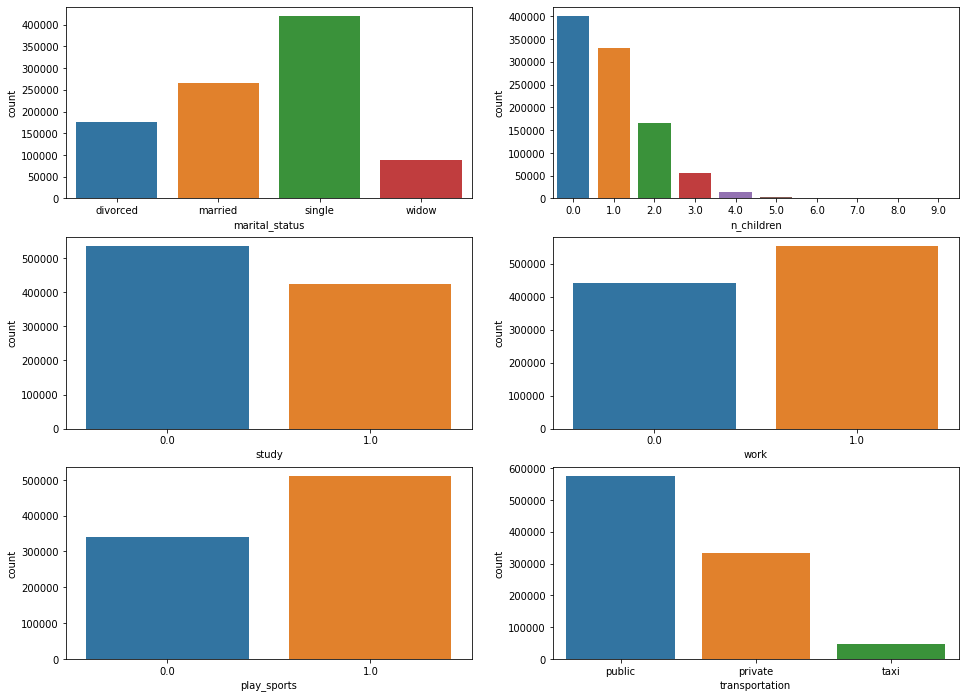

In [12]:
# Categorical distributions
_, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))

sns.countplot(x='marital_status', data=population, ax=ax[0, 0])
sns.countplot(x='n_children', data=population, ax=ax[0, 1])
sns.countplot(x='study', data=population, ax=ax[1, 0])
sns.countplot(x='work', data=population, ax=ax[1, 1])
sns.countplot(x='play_sports', data=population, ax=ax[2, 0])
sns.countplot(x='transportation', data=population, ax=ax[2, 1])

plt.show()

**Observations:**

- *name* is the ID of the person - only useful to merge datasets and can be dropped
- there's a lot of people in this dataset, let's see how many of them are actualy used in the next dataset
- there's a lot of missing value as well (let's see if we drop or replace them)
- *body_mass_index* seems to have unusual values, which typically ranges from 15 to 35.
- *marital_status* and *transportation* are categorical feature that need to be converted
- there are some outliers in *age*, *n_children* and *body_mass_index* (we can drop them or use a more rubust model)
- most of the people use public transportation, while just a few use taxi

## 2. Connections

Next we have a dataset containing a list of people connections and its virus transmission rate.

In [13]:
# Load the dataset
connections = pd.read_excel(f'{DATASETS_PATH}/original/conexoes_espec.xlsx')

# Translate columns to english
connections = connections.rename(columns={
    'V1': 'infecting',
    'V2': 'infected',
    'grau': 'degree',
    'proximidade': 'proximity',
    'prob_V1_V2': 'transmission_rate'
})

# Translate values to english
connections = connections.replace({
    'trabalho': 'work',
    'amigos': 'friends',
    'familia': 'family',
    'visita_frequente': 'frequent_visit',
    'visita_rara': 'rare_visit',
    'visita_casual': 'casual_visit',
    'mora_junto': 'live_together',
})

connections.head()

,infecting,infected,degree,proximity,transmission_rate
0,1,2,work,frequent_visit,0.589462
1,1,3,work,rare_visit,0.708465
2,2,4,work,casual_visit,NaN
3,2,5,work,rare_visit,0.638842
4,3,6,friends,live_together,NaN


In [14]:
# Save new dataset
connections.to_csv(f'{DATASETS_PATH}/processed/conexoes_espec_eda.csv', index=False)

In [15]:
# Dataset shape
print(f'dataset shape: {connections.shape}')

dataset shape: (999999, 5)


In [16]:
# Features and types
connections.dtypes

infecting              int64
infected               int64
degree                object
proximity             object
transmission_rate    float64
dtype: object

In [17]:
# Check for missing or null values in order_products
print(f'number of missing values: {connections.isna().sum().sum()}')

number of missing values: 500000


In [18]:
# Locating the missing values
connections.isna().sum()

infecting                 0
infected                  0
degree                    0
proximity                 0
transmission_rate    500000
dtype: int64

In [19]:
# Dataset statistics
connections.describe()

,infecting,infected,transmission_rate
count,999999.000000,999999.000000,499999.000000
mean,250000.250000,500001.000000,0.485162
std,144337.495129,288674.990257,0.173963
min,1.000000,2.000000,0.074462
25%,125000.500000,250001.500000,0.351677
50%,250000.000000,500001.000000,0.486413
75%,375000.000000,750000.500000,0.618210
max,500000.000000,1000000.000000,0.942245


In [20]:
# Number of unique values
connections.nunique()

infecting            500000
infected             999999
degree                    3
proximity                 4
transmission_rate    499999
dtype: int64

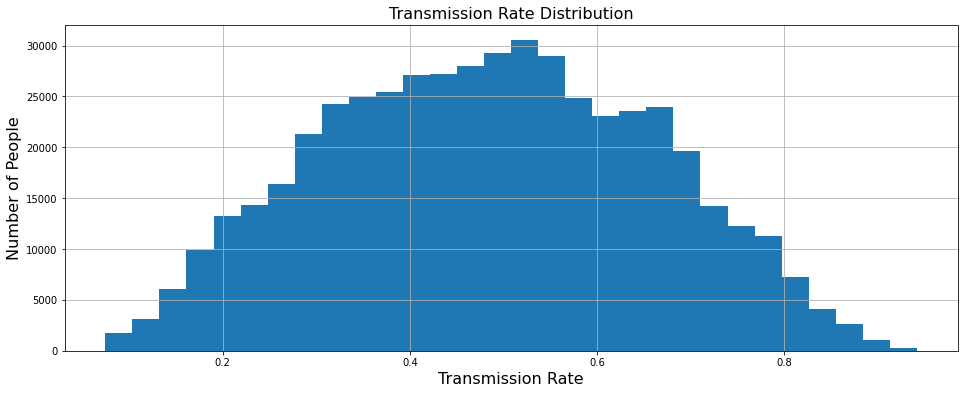

In [21]:
# Numerical distributions
_, ax = plt.subplots(figsize=(16, 6))
connections.hist('transmission_rate', bins=30, ax=ax)
ax.set_xlabel('Transmission Rate', size=16)
ax.set_ylabel('Number of People', size=16)
ax.set_title('Transmission Rate Distribution', size=16)
plt.show()

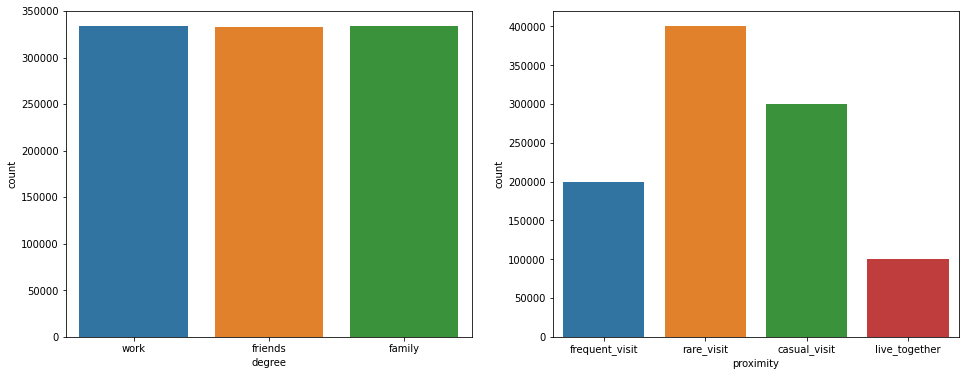

In [22]:
# Categorical distributions
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='degree', data=connections, ax=ax[0])
sns.countplot(x='proximity', data=connections, ax=ax[1])
plt.show()

**Observations:**

- *infecting* and *infected* will only be used to merge datasets
- here we have another dataset with lot of samples and we'll probably use just a subsample of it to evaluate the machine learning models
- half of the dataset does not contain the target variable *transmission_rate* and will be put aside as the submission file
- most of the people make *rare_visits*, while few people *live_together*